In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict

Question:
Compared with Milwaukee, which month has the lowest amount of crime from 2005 - 2019?

In [2]:
def haversine_miles(lat1, lon1, lat2, lon2):
    """Calculates the distance between two points on earth using the
    harversine distance (distance between points on a sphere)
    See: https://en.wikipedia.org/wiki/Haversine_formula

    :param lat1: latitude of point 1
    :param lon1: longitude of point 1
    :param lat2: latitude of point 2
    :param lon2: longitude of point 2
    :return: distance in miles between points
    """
    lat1, lon1, lat2, lon2 = (a/180*pi for a in [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(min(1, sqrt(a)))
    d = 3956 * c
    return d

In [3]:
with open("wibrarchive.csv") as f: 
    mildata = pd.read_csv(f)
milwauke = mildata["ReportedMonth"].values.tolist()
mil = sorted(milwauke)

In [4]:
with open("Location_Years.csv") as f:
    location = pd.read_csv(f)
df = location[['Year','month']]

In [5]:
years = df["Year"].unique().tolist()
years = sorted(years)[8:-2]

In [6]:
monthlist = []
for val in df["month"]:
    if eval(val)[0] in years:
        monthlist.append(eval(val)[1]) #https://www.geeksforgeeks.org/python-convert-string-to-tuple/
madisonlist = sorted(monthlist)

Population of Madison (2018): 258,054 #https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&met_y=population&idim=sub_county:5548000:5531000:2743000&hl=en&dl=en

Population of Milwaukee (2018): 592,025 #https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&ctype=l&strail=false&bcs=d&nselm=h&met_y=population&scale_y=lin&ind_y=false&rdim=country&idim=place:5553000&ifdim=country&hl=en&dl=en&ind=false

To make Milwaukee's statistics comparable to Madison's, I will divide the statistics of Milwaukee by 2.294. I used the population data of 2018 from the US Census Bureau. Milwaukee's population is approximately 2.294 times larger than Madison's.

In [17]:
madison = Counter(madisonlist)
madison

Counter({1: 1004,
         2: 789,
         3: 951,
         4: 1036,
         5: 1149,
         6: 1084,
         7: 1142,
         8: 1054,
         9: 1179,
         10: 1154,
         11: 1046,
         12: 1034})

In [9]:
MKE = Counter(mil)
MKE

Counter({1: 52338,
         2: 42169,
         3: 52433,
         4: 55867,
         5: 60498,
         6: 61544,
         7: 66490,
         8: 66118,
         9: 62076,
         10: 62909,
         11: 58202,
         12: 53368})

In [20]:
for key,val in MKE.items():
    MKE[key] = val/2.291
MKE

Counter({1: 9971.64811502166,
         2: 8034.208975550239,
         3: 9989.74790047252,
         4: 10644.007513506727,
         5: 11526.324423221758,
         6: 11725.612587238586,
         7: 12667.944575027517,
         8: 12597.0696256831,
         9: 11826.971385763396,
         10: 11985.677925558823,
         11: 11088.881187483104,
         12: 10167.887894120448})

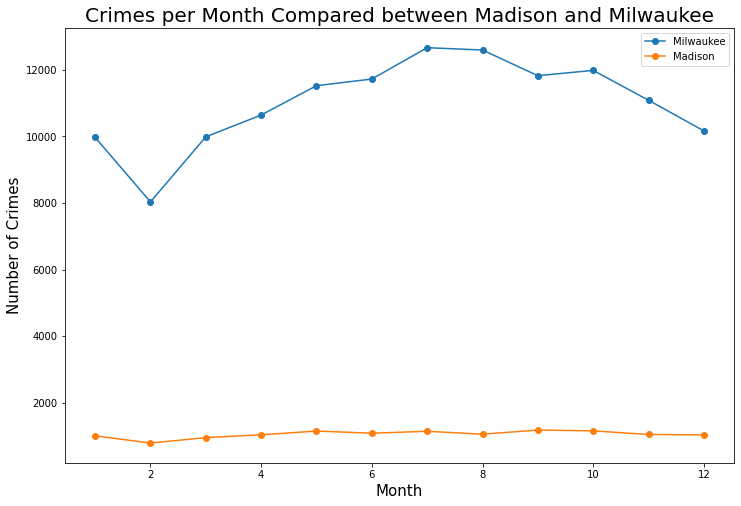

In [21]:
ax, fig = plt.subplots(figsize = (12,8))
plt.plot(list(MKE.keys()), list(MKE.values()),marker = "o") # scatter works better than bar as the difference is too great
plt.plot(list(madison.keys()),list(madison.values()), marker = "o")
plt.xlabel("Month", size =15)
plt.ylabel("Number of Crimes", size =15)
plt.title("Crimes per Month Compared between Madison and Milwaukee (Adjusted to Population Ratio)", size = 20)
plt.legend(("Milwaukee","Madison"))

Even if we divide the amount of reported incidents of Milwaukee by the ratio of the population of Madison, Milwaukee still boasts a significant higher number of incidents. On the graph, this is shown by how the high numbers of Milwaukee make Madison's data look like a flat line as the amount of crime in Madison per month hovers around a thousand. The trend that is set here is that crime is more common in the summer months than in winter. Perhaps it's too cold to do bad stuff. The graph also shows that the month of Feburary has the least amount of crime between 2005-2019 for both cities.

Conclusion: Feburary is the safest month within the year, and Madison remains a much safer city to live and study in.

